In [1]:
import numpy as np
import vedo
import os
from tqdm import tqdm
from MeshObject import *
import pandas as pd

shape_path = "../ShapeDatabase_INFOMR"
# HISTOGRAM FOR EACH NORMALIZATION STEP
# FOR PCA STEP - COMPUTE PCA FIRST, THEN COMPUTE PCA SECOND TIME ON ALIGNED SHAPE = IF DOT PRODUCT IS 1 FOR ONE (OR ALL?) AXIS - IT'S ALL GOOD

In [2]:
def object_statistics(mesh: MeshObject):
    return {
        "name": mesh.name,
        "class": mesh.class_type,
        "nfaces": mesh.n_faces,
        "nvertices": mesh.n_vertices,
        "face_type": mesh.face_type,
        "bounding_box": mesh.bounding_box
    }

def dataset_statistics(shape_path):
    #### BOUNDING BOX!! AXIS ALIGNED VIA XMAX-XMIN - compare with builtin bounds()
    stats = {
        "name": [],
        "class": [],
        "nfaces": [],
        "nvertices": [],
        "face_type": [],
        "bounding_box": []
    }

    # remove any directories that might not contain .obj files
    classes = [class_type for class_type in os.listdir(shape_path) if os.path.isdir((os.path.join(shape_path, class_type))) and class_type != ".git"]
    for class_type in tqdm(classes):
        class_path = os.path.join(shape_path, class_type)

        for obj_name in os.listdir(class_path):
            obj_path = os.path.join(class_path, obj_name)
            obj = MeshObject(obj_path, False, name=obj_name, class_type=class_type)

            # add to global dictionary
            obj_stats = object_statistics(obj)
            for attribute in stats.keys():
                stats[attribute].append(obj_stats[attribute]) 

    return stats

stats = dataset_statistics(shape_path)

100%|██████████| 69/69 [00:51<00:00,  1.35it/s]


In [3]:
df = pd.DataFrame(stats)
# df.to_csv("refined_data_statistics.csv", index=False)
df.to_pickle("refined_data_statistics.pickle")
df

,name,class,nfaces,nvertices,face_type,bounding_box
0,m433.obj,House,4236,2380,triangle,"[-0.49674985, 0.50325018, -0.45260289, 0.50462..."
1,m440.obj,House,11258,5587,triangle,"[-0.45707998, 0.54292005, -0.32674372, 0.41897..."
2,m448.obj,House,1502,762,triangle,"[-0.46376893, 0.50886691, -0.38023517, 0.61976..."
3,D00359.obj,House,66144,35522,triangle,"[-0.47593692, 0.52406311, -0.44028592, 0.46012..."
4,D00389.obj,House,50407,27493,triangle,"[-0.49988613, 0.5001139, -0.40455508, 0.384629..."
...,...,...,...,...,...,...
2478,m666.obj,Gun,11210,5615,triangle,"[-0.37021932, 0.62978065, -0.21206075, 0.29624..."
2479,D00929.obj,Gun,10660,5659,triangle,"[-0.39611125, 0.60388875, -0.27635112, 0.30413..."
2480,m664.obj,Gun,11206,5619,triangle,"[-0.4855535, 0.51444656, -0.23259662, 0.266829..."
2481,m650.obj,Gun,2464,1460,triangle,"[-0.4001427, 0.59985727, -0.24786393, 0.282282..."


# Finding different shapes accroding to vertex/face count

In [4]:
from math import ceil
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
avg_vertex_num = np.mean(df.nvertices)
avg_face_num = np.mean(df.nfaces)

vertex_avg = np.argmin([abs(shape-avg_vertex_num) for shape in df.nvertices.to_numpy()])
face_avg = np.argmin([abs(shape-avg_face_num) for shape in df.nfaces.to_numpy()])

vertex_min = np.argmin(df.nvertices.to_numpy())
face_min = np.argmin(df.nfaces.to_numpy())

vertex_max = np.argmax(df.nvertices.to_numpy())
face_max = np.argmax(df.nfaces.to_numpy())

print(f"ID of shape with an average count of vertices {vertex_avg}={df.iloc[vertex_avg].nvertices}, with the average number being {avg_vertex_num:.3f}")
print(f"ID of shape with an average count of vertices {face_avg}={df.iloc[face_avg].nfaces}, with the average number being {avg_face_num:.3f}")
print("-----------------")
print(f"ID of shape with lowest count of vertices {vertex_min}={df.iloc[vertex_min].nvertices}")
print(f"ID of shape with lowest count of faces {face_min}={df.iloc[face_min].nfaces}")
print("-----------------")
print(f"ID of shape with highest count of vertices {vertex_max}={df.iloc[vertex_max].nvertices}")
print(f"ID of shape with highest count of faces {face_max}={df.iloc[face_max].nfaces}")

ID of shape with an average count of vertices 1352=6081, with the average number being 6084.462
ID of shape with an average count of vertices 1157=12369, with the average number being 12378.613
-----------------
ID of shape with lowest count of vertices 2338=24
ID of shape with lowest count of faces 1468=44
-----------------
ID of shape with highest count of vertices 1406=98193
ID of shape with highest count of faces 1959=129881


## Average shape

In [6]:
avg_shape_vertex = df.iloc[vertex_avg]
avg_shape_face = df.iloc[face_avg]
avg_shape_vertex, avg_shape_face

(name                                                    m1007.obj
 class                                                PlantIndoors
 nfaces                                                       6270
 nvertices                                                    6081
 face_type                                                triangle
 bounding_box    [-0.36026695, 0.63973302, -0.34193978, 0.38769...
 Name: 1352, dtype: object,
 name                                                   D00891.obj
 class                                                      Violin
 nfaces                                                      12369
 nvertices                                                    1959
 face_type                                                triangle
 bounding_box    [-0.4194153, 0.58058476, -0.18108019, 0.165916...
 Name: 1157, dtype: object)

In [7]:
os.path.join(shape_path, avg_shape_vertex["class"], avg_shape_vertex["name"])

'../ShapeDatabase_INFOMR/PlantIndoors/m1007.obj'

In [8]:
mesh = MeshObject(os.path.join(shape_path, avg_shape_vertex["class"], avg_shape_vertex["name"]), visualize=True, name=avg_shape_vertex["name"], class_type=avg_shape_vertex["class"])
mesh.plotter.title = "Average shape in terms of number of vertices"
mesh.show()

In [9]:
mesh = MeshObject(os.path.join(shape_path, avg_shape_face["class"], avg_shape_face["name"]), visualize=True)
mesh.plotter.title = "Average shape in terms of number of faces"
mesh.show()

## Minimum shape

In [10]:
min_shape_vertex = df.iloc[vertex_min]
min_shape_face = df.iloc[face_min]
min_shape_vertex, min_shape_face

(name                                                    m1102.obj
 class                                                        Tool
 nfaces                                                         52
 nvertices                                                      24
 face_type                                                triangle
 bounding_box    [-0.37799075, 0.62200928, -0.092665277, 0.0926...
 Name: 2338, dtype: object,
 name                                                     m855.obj
 class                                                       Shelf
 nfaces                                                         44
 nvertices                                                      46
 face_type                                                triangle
 bounding_box    [-0.46867281, 0.53132719, -0.46766952, 0.46807...
 Name: 1468, dtype: object)

In [11]:
mesh = MeshObject(os.path.join(shape_path, min_shape_vertex["class"], min_shape_vertex["name"]), visualize=True)
mesh.plotter.title = "Smallest shape in terms of number of vertices"
mesh.show()

In [12]:
mesh = MeshObject(os.path.join(shape_path, min_shape_face["class"], min_shape_face["name"]), visualize=True)
mesh.plotter.title = "Smallest shape in terms of number of faces"
mesh.show()

## Maximum

In [13]:
max_shape_vertex = df.iloc[vertex_max]
max_shape_face = df.iloc[face_max]
max_shape_vertex, max_shape_face

(name                                                   D00159.obj
 class                                                PlantIndoors
 nfaces                                                      32731
 nvertices                                                   98193
 face_type                                                triangle
 bounding_box    [-0.47549793, 0.5245021, -0.41935509, 0.450282...
 Name: 1406, dtype: object,
 name                                                    m1120.obj
 class                                                     Biplane
 nfaces                                                     129881
 nvertices                                                   65722
 face_type                                                triangle
 bounding_box    [-0.35659641, 0.53678387, -0.49164504, 0.50835...
 Name: 1959, dtype: object)

In [30]:
MeshObject(shape_path + "/Biplane/m1120.obj", visualize=True).non_manifold_faces(tol=0).fill_holes()

[vedo.mesh:460] INFO: 
 --------- Non manifold faces ---------
 Average tol.   :  0.9878 +-  0.4155
 Removed faces  : 15
 Recovered faces: 0


True

In [14]:
mesh = MeshObject(os.path.join(shape_path, max_shape_vertex["class"], max_shape_vertex["name"]), visualize=True)
mesh.plotter.title = "Biggest shape in terms of number of vertices"
mesh.show()

In [15]:
mesh = MeshObject(os.path.join(shape_path, max_shape_face["class"], max_shape_face["name"]), visualize=True)
mesh.plotter.title = "Biggest shape in terms of number of faces"
mesh.show()

In [16]:
df[df["class"] == "Skyscraper"].nvertices.max()

np.int64(73697)

# Overall statistics

In [23]:
def plot_attribute(df, attribute, estimator):
    label_name_map = {
        "nvertices": "vertices",
        "nfaces": "faces",
        "class": "shapes"
    }

    aux_df = df
    sns.set_theme(style="whitegrid")

    plt.figure(figsize=(16,9))
    if type(df[attribute].iloc[0]) is not str:
        mean_value_attribute = np.mean(df[attribute])
        aux_df = df.sort_values(attribute, ascending=False).reset_index(drop=True)
        # sns.barplot(data=aux_df, y=attribute, estimator=estimator) # switch to sum/mean - mean might not be best?
        x = np.log(aux_df[attribute])
        sns.histplot(data=aux_df, x=x, bins=1000) # switch to sum/mean - mean might not be best?
    else:
        mean_value_attribute = np.mean(aux_df["class"].value_counts())
        sns.countplot(data=aux_df, x="class", order=aux_df["class"].value_counts().index) # switch to sum/mean - mean might not be best?
        
    plt.xticks(rotation=90)
    sns.despine()
    # if type(df[attribute].iloc[0]) is not str:
    #     plt.text(x=64, y=mean_value_attribute + mean_value_attribute*0.1, s=f"{mean_value_attribute:.3f}", color="red")
    # else:
    #     plt.text(x=64, y=mean_value_attribute + 2, s=f"{mean_value_attribute:.3f}", color="red")

    # plt.hlines(y=mean_value_attribute, xmin=-1, xmax=69, colors="red", linestyles="dashed")
    # plt.xlim((-1,69))
    plt.xlabel("Class")
    plt.ylabel(f"Number of {label_name_map[attribute]}")
    plt.show()

<Axes: xlabel='nvertices', ylabel='Count'>

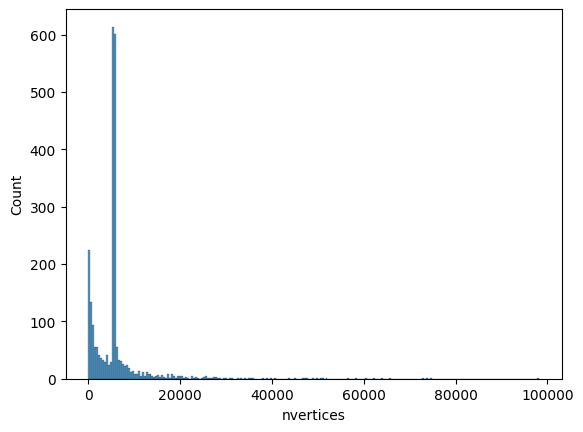

In [20]:
sns.histplot(x=df["nvertices"])

show vertex for entire dataset rather than per class

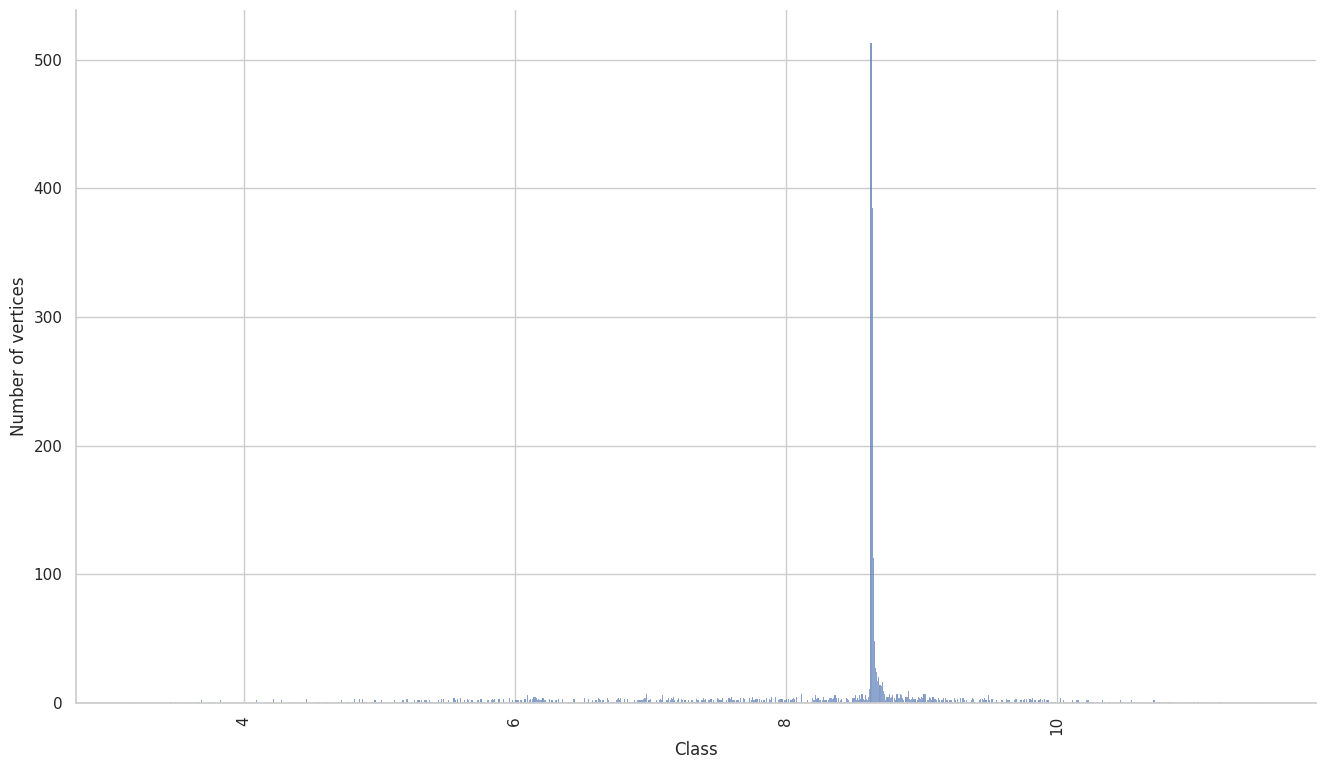

In [24]:
plot_attribute(df, "nvertices", "max")

In [22]:
plot_attribute(df, "nfaces", "max")

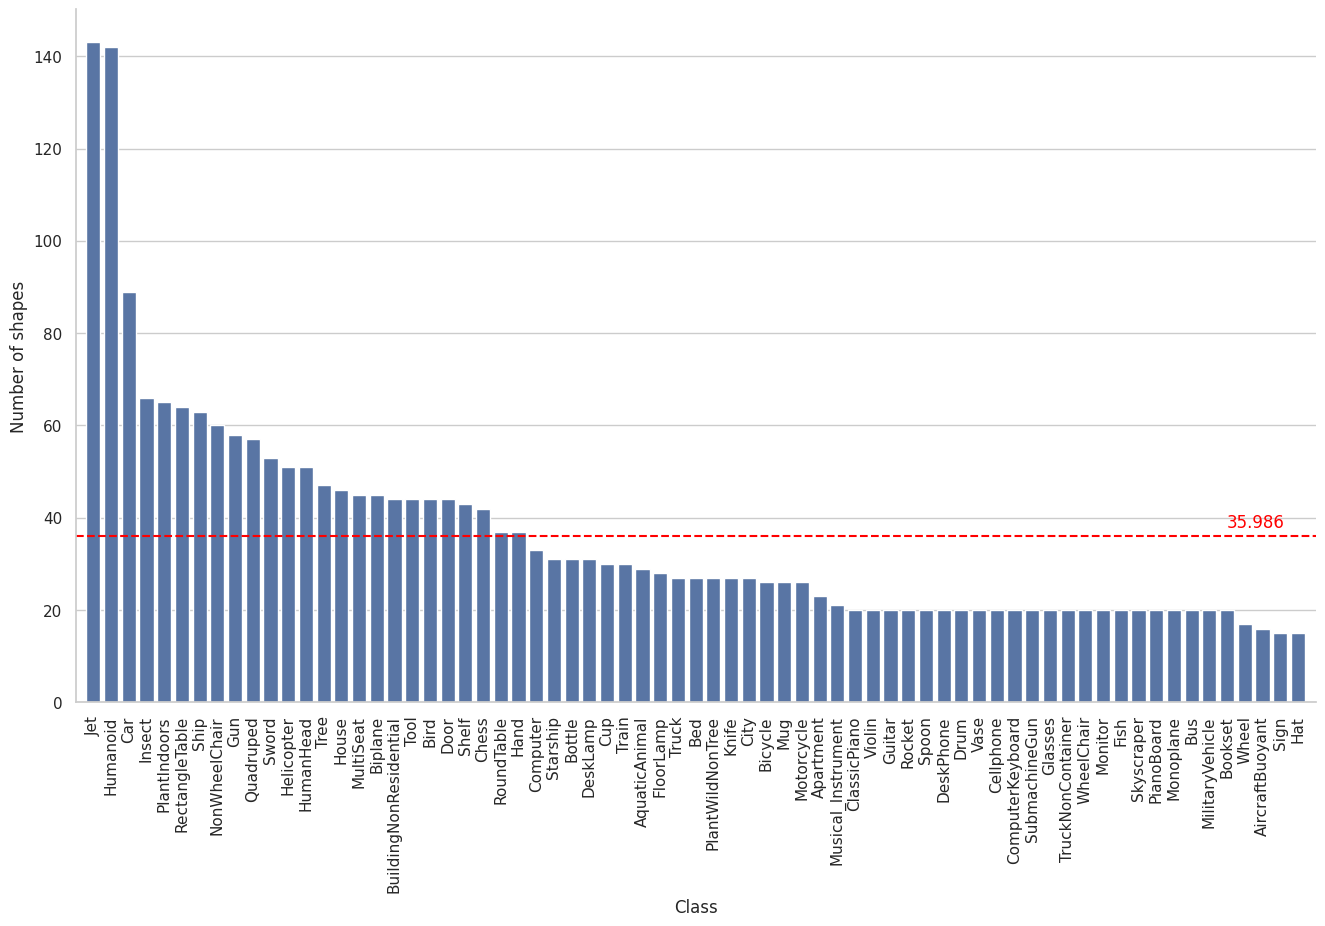

In [36]:
plot_attribute(df, "class", None)

In [37]:
df[(df["nfaces"] < 100) | (df["nvertices"] < 100)]

,name,class,nfaces,nvertices,face_type,bounding_box
181,m782.obj,MultiSeat,46,40,triangle,"[-0.500139, 0.499861, -0.27814481, 0.22554284,..."
203,m783.obj,MultiSeat,120,66,triangle,"[-0.50000006, 0.49999994, -0.1923725, 0.151466..."
204,m778.obj,MultiSeat,90,46,triangle,"[-0.18064976, 0.3668741, -0.48755053, 0.491530..."
217,m840.obj,MultiSeat,180,94,triangle,"[-0.33941829, 0.40096685, -0.48107886, 0.51892..."
365,D00474.obj,Spoon,363,72,triangle,"[-0.51646715, 0.48353282, -0.024815241, 0.0248..."
600,m533.obj,Vase,68,32,triangle,"[-0.31099775, 0.31105796, -0.37431228, 0.62568..."
686,m1300.obj,Jet,76,39,triangle,"[-0.36513004, 0.36513031, -0.45847526, 0.54152..."
714,m1231.obj,Jet,130,79,triangle,"[-0.32099685, 0.32099676, -0.3861433, 0.613856..."
782,D01144.obj,Door,132,68,triangle,"[-0.16246618, 0.15669899, -0.36864913, 0.63135..."
796,m1711.obj,Door,132,68,triangle,"[-0.1624662, 0.15669905, -0.36864913, 0.631350..."


In [38]:
classes = [class_type for class_type in os.listdir(shape_path) if os.path.isdir((os.path.join(shape_path, class_type))) and class_type != ".git"]
center_of_mass_diff = []
scaling_check = []
scaling_axes = []
for class_type in tqdm(classes):
    class_path = os.path.join(shape_path, class_type)
    class_path_orig = os.path.join(shape_path + "_orig", class_type)

    for obj_name in os.listdir(class_path):
        obj_path = os.path.join(class_path, obj_name)
        obj_path_orig = os.path.join(class_path_orig, obj_name)

        obj = MeshObject(obj_path, False)
        obj_orig = MeshObject(obj_path_orig, False)

        center_of_mass_diff += [np.round(np.zeros(3) - obj.center_of_mass(), 6)]
        scaling_check += [[obj.volume(), obj_orig.volume(), obj_path]]
        scaling_axes += [obj.bounding_box]

center_of_mass_diff = np.asarray(center_of_mass_diff)
scaling_check = np.asarray(scaling_check)
scaling_axes = np.asarray(scaling_axes)

100%|██████████| 69/69 [01:54<00:00,  1.65s/it]


In [93]:
aux_mass_diff = {
    "x": center_of_mass_diff[:,0], 
    "y": center_of_mass_diff[:,1],
    "z": center_of_mass_diff[:,2]
    }

aux_scaling = {
    "x": np.abs(scaling_axes[:,0]) + np.abs(scaling_axes[:,1]), 
    "y": np.abs(scaling_axes[:,2]) + np.abs(scaling_axes[:,3]),
    "z": np.abs(scaling_axes[:,4]) + np.abs(scaling_axes[:,5])
    }

In [94]:
matrix_scale = [aux_scaling["x"], aux_scaling["y"], aux_scaling["z"]]
matrix_scale = np.asarray(matrix_scale)
matrix_scale.shape

(3, 2483)

<Axes: ylabel='Count'>

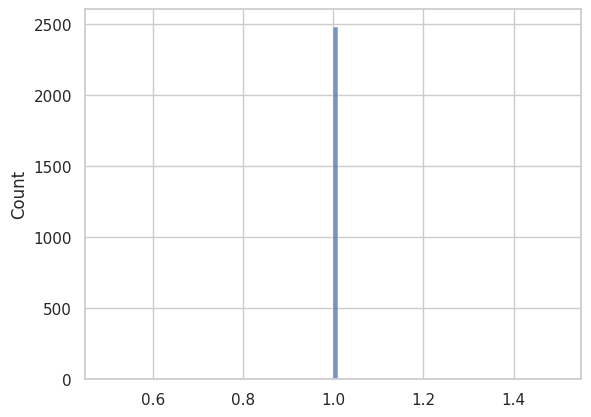

In [137]:
max_bb = np.round(np.max(matrix_scale, axis=0), 6)
sns.histplot(max_bb, bins=100)

In [40]:
scaling_check[scaling_check[:,0].astype("float") > 1]

array([['1.1082603789724397', '1.1312315311013477',
        '../ShapeDatabase_INFOMR/Drum/D00115.obj'],
       ['1.104011745712', '16.947685158393213',
        '../ShapeDatabase_INFOMR/Drum/D00404.obj']], dtype='<U55')

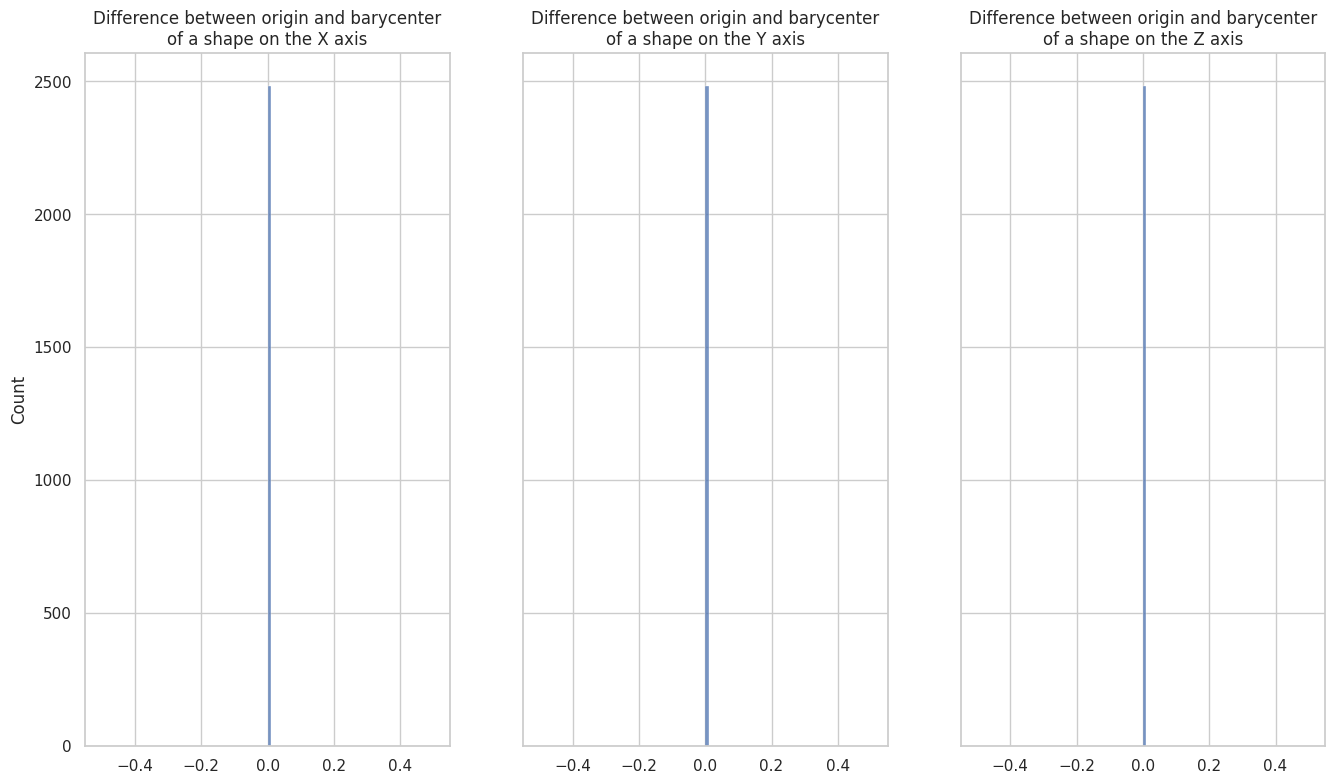

In [41]:
fig, axes = plt.subplots(1, 3, figsize=(16,9), sharey=True)

sns.histplot(aux_mass_diff["x"], ax=axes[0], bins=100)
sns.histplot(aux_mass_diff["y"], ax=axes[1], bins=100)
sns.histplot(aux_mass_diff["z"], ax=axes[2], bins=100)
axes[0].set_title("Difference between origin and barycenter\nof a shape on the X axis")
axes[1].set_title("Difference between origin and barycenter\nof a shape on the Y axis")
axes[2].set_title("Difference between origin and barycenter\nof a shape on the Z axis")
plt.show()

In [ ]:
# show largest axis per shape instead of all axes

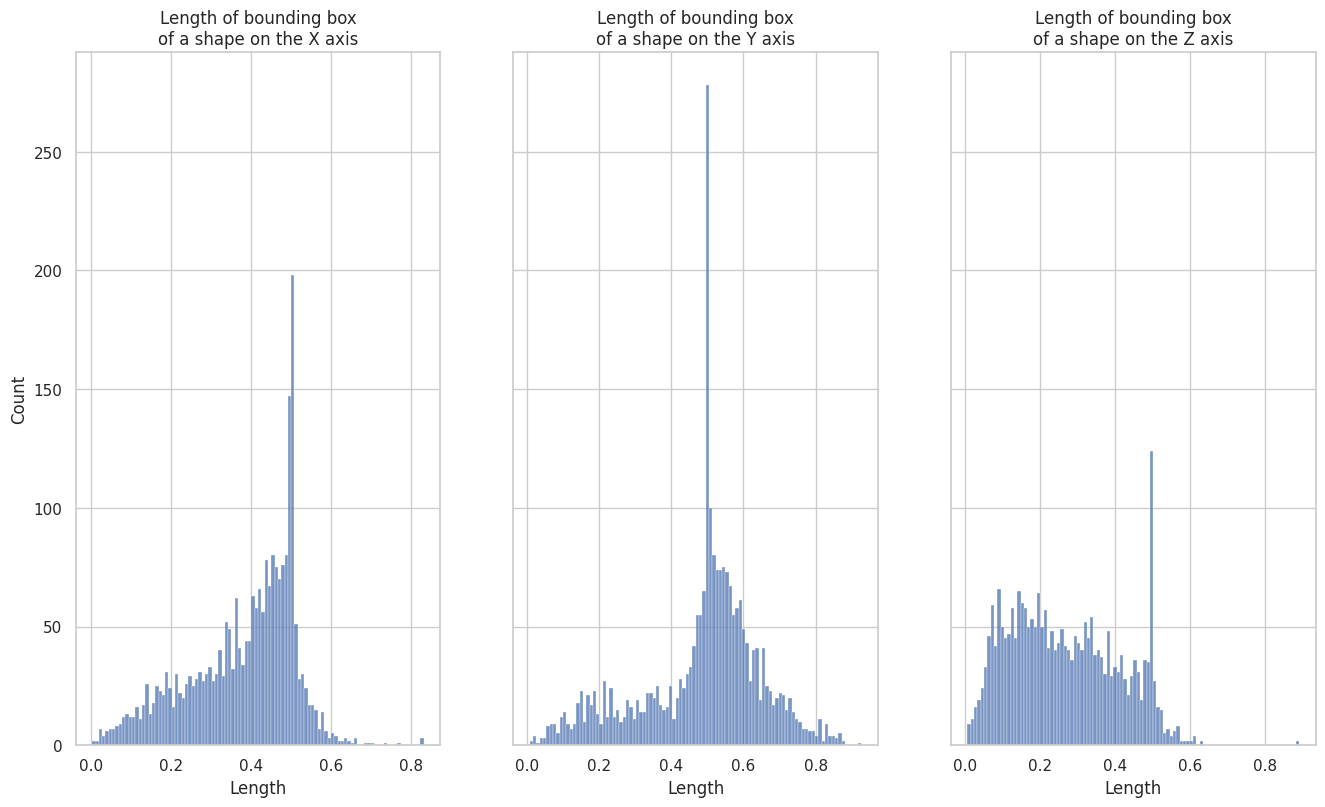

In [42]:
fig, axes = plt.subplots(1, 3, figsize=(16,9), sharey=True)

sns.histplot(aux_scaling["x"], ax=axes[0], bins=100)
sns.histplot(aux_scaling["y"], ax=axes[1], bins=100)
sns.histplot(aux_scaling["z"], ax=axes[2], bins=100)
axes[0].set_title("Length of bounding box\nof a shape on the X axis")
axes[0].set_xlabel("Length")
axes[1].set_title("Length of bounding box\nof a shape on the Y axis")
axes[1].set_xlabel("Length")
axes[2].set_title("Length of bounding box\nof a shape on the Z axis")
axes[2].set_xlabel("Length")
plt.show()

In [23]:
scaling_check[:,0]

array(['0.0021822516050371017', '0.04911081498766394',
       '0.1143142566683029', ..., '0.038349759648323316',
       '0.005278364072186984', '0.01690064399788383'], dtype='<U55')

Text(0.5, 0, 'Volume')

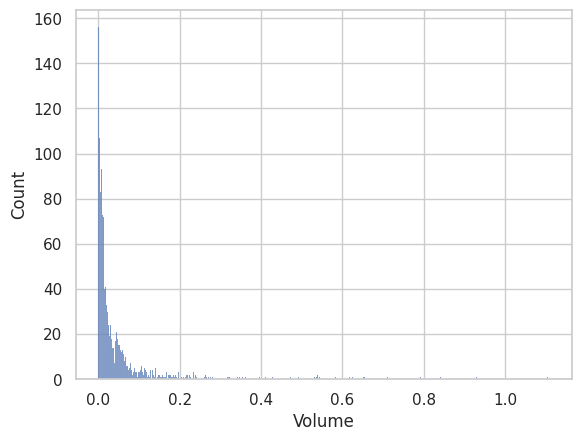

In [43]:
sns.histplot(x=scaling_check[:,0].astype(float), bins=1000)
plt.xlabel("Volume")

In [4]:
from Pipeline import *

mesh = MeshObject("../ShapeDatabase_INFOMR_orig/Bed/D00735.obj", True)
pipeline = Pipeline(pipeline_parameters={"subdivision": {"threshold":5610}})
# mesh.show()
print(mesh.n_vertices)
m = pipeline.normalize_shape(mesh)
print(m.n_vertices)
m.show()

453
6176


In [ ]:
pipeline = Pipeline(disable_components=["barycenter_translation", "axis_alignment", "flip_moment", "scaling"], pipeline_parameters={"subdivision": {"threshold":5610}})
